# Table of Contents | ASD DATA 

- [The BREAST-CANCER dataset](#The-BREAST-CANCER-dataset):
    - [Load the dataset](#Load-the-Dataset)
    - [Explore the dataset: Descriptive statistics](#Explore-the-dataset:-Descriptive-statistics)
    - [Explore the dataset: Visualization](#Explore-the-dataset:-Visualization)
    



The entire project has been based on the following study [Investigating the Correspondence of Clinical  Diagnostic Grouping With Underlying Neurobiological and Phenotypic Clusters Using Unsupervised Machine Learning](https://doi.org/10.1016/j.dib.2018.01.080).

The work focuses on two different pathologies in brain disorders: ASD and ADHD

## The ASD dataset

available at [ABIDE I database](https://fcon_1000.projects.nitrc.org/indi/abide/abide_I.html).


This is .......
 
This data set includes 286 intances (201 of one class, 85 of another class).  The instances are described by 9 attributes, some of which are ordinal and some are nominal.
 
Attribute information

| column | values |
| --- | --- |
| Class | no-recurrence-events, recurrence-events |
| age | 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99|
| menopause | lt40, ge40, premeno|
| tumor-size | 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59|
| inv-nodes | 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39|
| node-caps | yes, no|
| deg-malig | 1, 2, 3|
| breast | left, right|
| breast-quad | left-up, left-low, right-up, right-low, central|
| irradiat | yes, no|
 
There are 9 Missing Attribute Values (denoted by "?") 


In [116]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt #for the plots
import seaborn as sns 

We start opening the dataset. 

pd. We know from  the datasheets of the dataset provided by ABIDE which are the ranges of the categories and we noted that there are some values in the data categorized as -9999, which is a way to denoted missing data o values out of range, so we are going to consider them as NaN.

In [117]:
ASD_phenotypic = pd.read_csv(os.path.join('DataSets','Phenotypic Datasets','ASD','ASD_phenotypic.csv'), na_values='-9999')


In [ ]:
#restituiamo il percorso completo del nostro file
ASD_phenotypic = pd.read_csv(os.path.join('Datasets','Phenotypic Datasets','ASD','ASD_phenotypic.csv'),na_values = '-9999')
#contiamo questi errori di registrazione 
errors = '-9999'
#dizionario per memorizzare risultati per ogni colonna
errors_per_feature = {}
#Iterazione su tutte le colonne
for col in ASD_phenotypic.columns:
    # Conta i valori nella colonna e memorizza il risultato nel dizionario
    errors_per_feature[col] = (ASD_phenotypic[col] == errors).sum()

# Stampa i risultati
for col, conteggio in errors_per_feature.items():
    print(f"Numero di elementi con valore '{errors}' nella colonna '{col}': {conteggio}")

In [118]:
#visualizziamo, non completamente, il nostro dataset
#e otteniamone la dimensione: prima info utile
ASD_phenotypic

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
0,CALTECH,51456,1,4.0,55.40,1,R,NaN,126.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1,CALTECH,51457,1,4.0,22.90,1,Ambi,NaN,107.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
2,CALTECH,51458,1,1.0,39.20,1,R,NaN,93.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
3,CALTECH,51459,1,1.0,22.80,1,R,NaN,106.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
4,CALTECH,51460,1,1.0,34.60,2,Ambi,NaN,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,YALE,50624,1,3.0,11.08,2,R,NaN,90.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1108,YALE,50625,1,3.0,7.00,1,L,NaN,99.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1109,YALE,50626,1,3.0,11.08,1,L,NaN,61.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1110,YALE,50627,1,3.0,9.50,2,R,NaN,88.0,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


##  CATEGORICAL EXPLORATION

In [ ]:
#otteniamo le informazioni relative al dataset
ASD_phenotypic.info()

In [ ]:
#guardando il database, si è notata una colonna con più di un valore separati da ; -> controllo per capire se vengono letti tutti 
#medname = ASD_phenotypic['MEDICATION_NAME']
#medname

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

#medname

In [ ]:
#vogliamo individuare e capire cosa sono questi object
objects = ASD_phenotypic.select_dtypes(include=['object'])
objects

In [ ]:
objects.T

In [ ]:
for index, row in objects.T.iterrows():
    values=row.value_counts(dropna=False)
    print(values)

# NUMERICAL EXPLORATION

The dataset has 1112 raws anf 74 colums

In [125]:
ASD_phenotypic.shape

1112

Now we check the presence of missing values catalogated as None or numpy.NaN

In [127]:
nan_values = ASD_phenotypic.isna().sum()

# Filter columns with NaN values
columns_with_nan = nan_values[nan_values > 0]


# Print the number of attributes with NaN values
print("Number of attributes with NaN values:", len(columns_with_nan))

# Print the columns with NaN values and their corresponding counts
print("Attributes with NaN values and their counts:")
pd.set_option('display.max_rows', 74)
columns_with_nan


0
Number of attributes with NaN values: 68
Attributes with NaN values and their counts:


DSM_IV_TR                            72
HANDEDNESS_CATEGORY                 326
HANDEDNESS_SCORES                   748
FIQ                                  72
VIQ                                 195
PIQ                                 181
FIQ_TEST_TYPE                       169
VIQ_TEST_TYPE                       278
PIQ_TEST_TYPE                       259
ADI_R_SOCIAL_TOTAL_A                734
ADI_R_VERBAL_TOTAL_BV               733
ADI_RRB_TOTAL_C                     734
ADI_R_ONSET_TOTAL_D                 815
ADI_R_RSRCH_RELIABLE                721
ADOS_MODULE                         605
ADOS_TOTAL                          697
ADOS_COMM                           722
ADOS_SOCIAL                         721
ADOS_STEREO_BEHAV                   781
ADOS_RSRCH_RELIABLE                 736
ADOS_GOTHAM_SOCAFFECT               847
ADOS_GOTHAM_RRB                     842
ADOS_GOTHAM_TOTAL                   839
ADOS_GOTHAM_SEVERITY                839
SRS_VERSION                         881


Is there some attribute with only missing values?

In [128]:

columns_only_nan = nan_values[nan_values == ASD_phenotypic.shape[0]]
print(len(columns_only_nan))

0


As there are too much, maybe is usefull to understand which columns haven't NaN values.

In [ ]:
# Filter columns without NaN values
columns_without_nan = nan_values[nan_values == 0]

# Print the columns with NaN values and their corresponding counts
print("Attributes without NaN values and their counts:")
columns_without_nan

Attributes without NaN values and their counts:


SITE_ID               0
SUB_ID                0
DX_GROUP              0
AGE_AT_SCAN           0
SEX                   0
EYE_STATUS_AT_SCAN    0
dtype: int64

I'm also interested in knowing if the area

Let's have a look on the general statistics for the numerical attributes.

In [ ]:
ASD_phenotypic.describe()

,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,ADI_R_SOCIAL_TOTAL_A,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
count,1112.000000,1112.000000,1040.000000,1112.000000,1112.000000,364.000000,1040.000000,917.000000,931.000000,378.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,1112.000000,100.000000,94.000000
mean,50752.684353,1.515288,0.639423,17.048864,1.147482,60.567225,108.380962,107.812432,106.625134,19.767196,...,11.636364,9.909091,11.545455,10.127273,10.363636,8.763636,9.890909,1.312050,12.951700,20.519255
std,447.680666,0.499991,0.828849,8.036419,0.354745,47.495811,15.072062,16.244305,15.339533,5.527245,...,3.014555,3.187201,2.651472,3.232099,2.914610,2.821634,2.753266,0.463539,2.193555,5.244446
min,50002.000000,1.000000,0.000000,6.470000,1.000000,-100.000000,41.000000,42.000000,37.000000,2.000000,...,4.000000,3.000000,7.000000,2.000000,2.000000,4.000000,1.000000,1.000000,8.290000,6.530000
25%,50354.750000,1.000000,0.000000,11.658575,1.000000,52.750000,99.000000,98.000000,97.000000,16.000000,...,10.000000,7.000000,10.000000,7.500000,9.500000,7.000000,8.000000,1.000000,11.265000,17.422500
50%,50724.500000,2.000000,0.000000,14.660000,1.000000,75.000000,109.000000,108.000000,107.000000,20.000000,...,11.000000,11.000000,11.000000,10.000000,11.000000,9.000000,10.000000,1.000000,12.945000,19.945000
75%,51153.250000,2.000000,1.000000,20.085000,1.000000,91.000000,119.000000,119.000000,117.000000,24.000000,...,13.000000,12.000000,12.500000,12.500000,12.000000,10.500000,12.000000,2.000000,14.462500,22.645000
max,51607.000000,2.000000,4.000000,64.000000,2.000000,100.000000,148.000000,180.000000,157.000000,30.000000,...,19.000000,15.000000,19.000000,17.000000,14.000000,15.000000,16.000000,2.000000,17.940000,35.430000


ValueError: could not convert string to float: 'CALTECH'

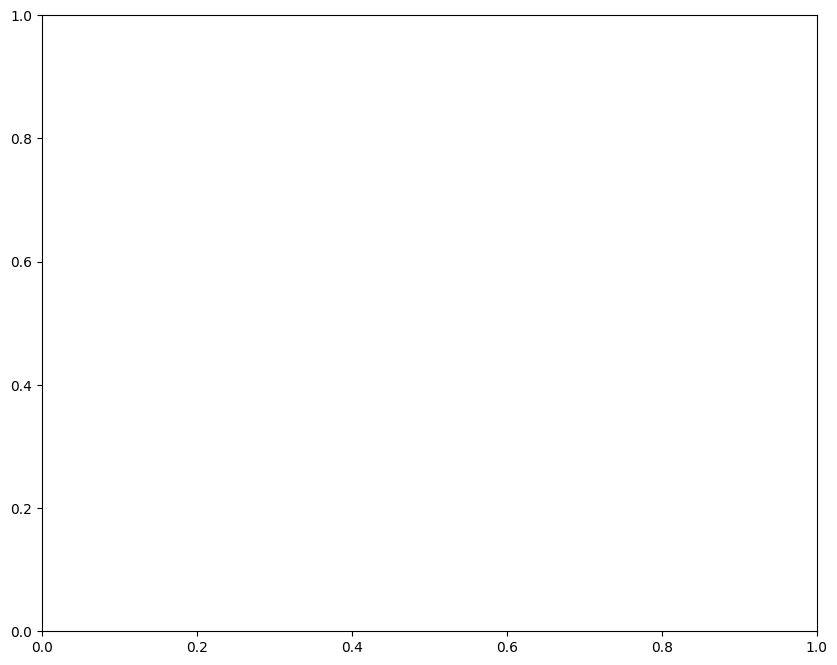

In [ ]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(ASD_phenotypic.drop('DX_GROUP',axis = 1).corr(), 
            annot=True, 
            linewidths=.5, 
            fmt= '.2f',
            ax=ax,
            vmin=-1, 
            vmax=1,
            cmap = "coolwarm")
plt.show()

Drop attribute if:
- Only unique values
- Only missing values